In [2]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns 
import statsmodels.api as sm
from sklearn.preprocessing import scale,robust_scale,minmax_scale

In [3]:
#다중공정성 패키지
from statsmodels.stats.outliers_influence import variance_inflation_factor
#sklearn 선형회귀 모형 :변수선택법
from sklearn.linear_model import LinearRegression
#변수 선택법: 후진제거법
from sklearn.feature_selection import RFE
# 데이터 스케일
from sklearn.preprocessing import scale

In [4]:
df_boston = pd.read_csv("BOSTON_HOUSING.csv",engine= 'python')
df_boston.head()

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [5]:
df_boston.columns

Index(['MEDV', 'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
# 결측치 확인
df_boston.isnull().sum()


MEDV       0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [7]:
# 목표변수, 설명변수 역할 지정
df_boston_y = df_boston['CRIM'] # 목표변수
df_boston_x = df_boston.drop('CRIM', axis = 1, inplace = False)

print("목표변수 데이터 크기 : {}".format(df_boston_y.shape))
print("설명변수 데이터 크기 : {}".format(df_boston_x.shape))

목표변수 데이터 크기 : (506,)
설명변수 데이터 크기 : (506, 13)


In [8]:
df_boston_x.columns


Index(['MEDV', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [9]:
#절편추가
df_boston_x_const = sm.add_constant(df_boston_x)
df_boston_x_const.head()

,const,MEDV,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,24.000000,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,1.0,21.600000,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,1.0,34.700001,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,1.0,33.400002,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,1.0,36.200001,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33


In [10]:
# 변수간의 상관관계 분석
df_boston.corr().round(3)

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
MEDV,1.000,-0.388,0.360,-0.484,0.175,-0.427,0.695,-0.377,0.250,-0.382,-0.469,-0.508,0.333,-0.738
CRIM,-0.388,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456
ZN,0.360,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413
INDUS,-0.484,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604
CHAS,0.175,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054
NOX,-0.427,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591
RM,0.695,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614
AGE,-0.377,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602
DIS,0.250,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497
RAD,-0.382,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489


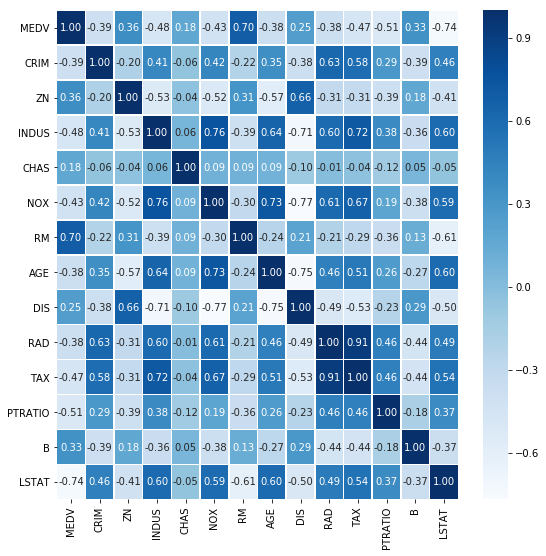

In [11]:
# heatmap
plt.figure(figsize=(9,9))
sns.heatmap(df_boston.corr(), annot=True,fmt = '.2f', linewidths=.5, cmap='Blues')


In [12]:
def scatter_g(feature):
    sns.scatterplot(x = feature,y = "CRIM",data = df_boston ,marker = 'x')

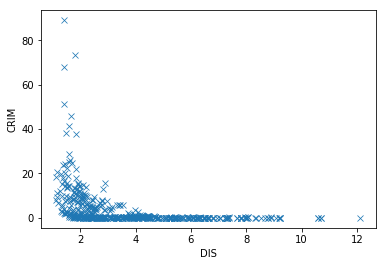

In [13]:
# 설정 1 
# 설정 1) 범죄율은 교통이 발전한 지역에서 빈번하게 일어난다.
#요인변수 : DIS , RAD , NOX
scatter_g("DIS")

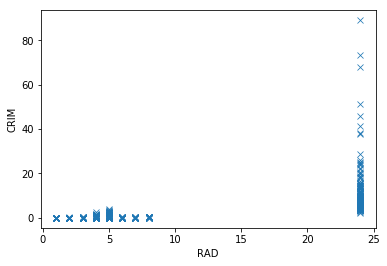

In [14]:
# 고속도로 접근율
scatter_g("RAD")

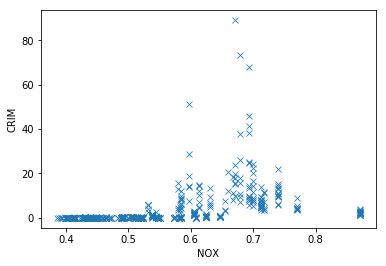

In [15]:
# 산화 질소의 농도가 높으면, 차량이 많다 교통의 중심지
scatter_g("NOX")

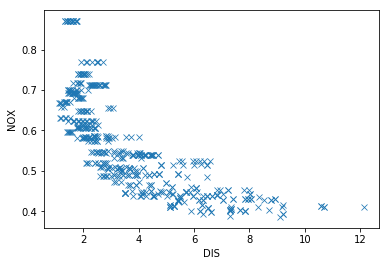

In [16]:
#실제로 산화질소NOX와 DIS는 상관관계가 - 0.77로 음의 상관관계가 높다
# 이는 DIS가 작아지면, 중심지와의 거리가 가까워지므로, NOX가 높아진다.
sns.scatterplot(x = "DIS",y = "NOX",data = df_boston ,marker = 'x')

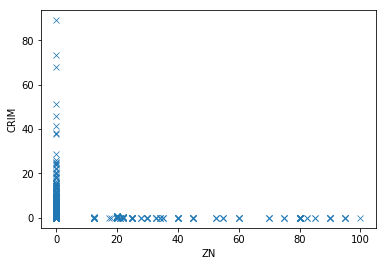

In [17]:
sns.scatterplot(x = "ZN",y = "CRIM",data = df_boston ,marker = 'x')

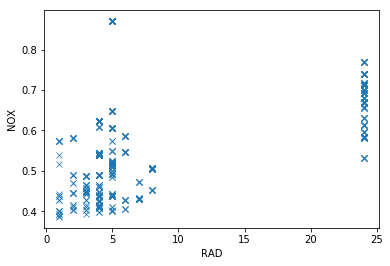

In [18]:
sns.scatterplot(x = "RAD",y = "NOX",data = df_boston ,marker = 'x')
# 고속도로 접근 편이성 지수가 높을 수록 높은 농도의 산화질소가 존재

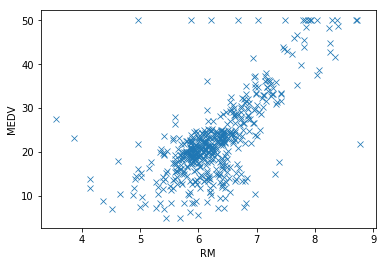

In [19]:
sns.scatterplot(x = "RM",y = "MEDV",data = df_boston ,marker = 'x')
# 방의수가 많으면 주택가격이 상승

In [20]:
df_boston[df_boston['NOX']> 0.8]  # 공통된 값(0.8이상)이 많아 이상치를 처리 하지 않는다.

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
142,13.400000,3.32105,0.0,19.58,1,0.871,5.403,100.000000,1.3216,5,403,14.7,396.899994,26.820000
143,15.600000,4.09740,0.0,19.58,0,0.871,5.468,100.000000,1.4118,5,403,14.7,396.899994,26.420000
144,11.800000,2.77974,0.0,19.58,0,0.871,4.903,97.800003,1.3459,5,403,14.7,396.899994,29.290001
145,13.800000,2.37934,0.0,19.58,0,0.871,6.130,100.000000,1.4191,5,403,14.7,172.910004,27.799999
146,15.600000,2.15505,0.0,19.58,0,0.871,5.628,100.000000,1.5166,5,403,14.7,169.270004,16.650000
147,14.600000,2.36862,0.0,19.58,0,0.871,4.926,95.699997,1.4608,5,403,14.7,391.709992,29.530001
148,17.799999,2.33099,0.0,19.58,0,0.871,5.186,93.800003,1.5296,5,403,14.7,356.989990,28.320000
149,15.400000,2.73397,0.0,19.58,0,0.871,5.597,94.900002,1.5257,5,403,14.7,351.850006,21.450001
150,21.500000,1.65660,0.0,19.58,0,0.871,6.122,97.300003,1.6180,5,403,14.7,372.799988,14.100000
151,19.600000,1.49632,0.0,19.58,0,0.871,5.404,100.000000,1.5916,5,403,14.7,341.600006,13.280000


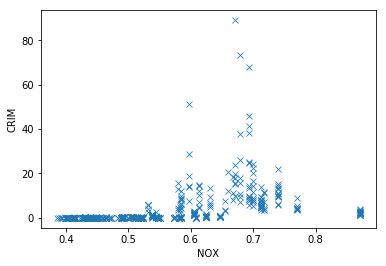

In [21]:
# 설정1 의 결과를 CRIM과 엮어서 보자
# 먼저 SCATTER
scatter_g("NOX")

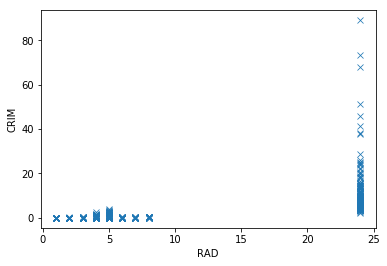

In [22]:
scatter_g("RAD")

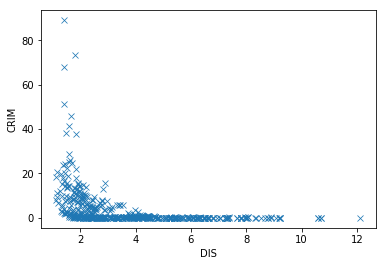

In [23]:
scatter_g("DIS")

In [24]:
# 세 변수에 따른 산포도를 분석한 결과, 교통이 발달한 지역은 높은 범죄율의 산포나온다.
# 이 세가지 변수를 설명 변수로 두고, 회기를 실행해보자
# 그전에 다중공정성을 보자
df_vif = pd.DataFrame()
# 변수명 입력
ds_boston_y = df_boston["CRIM"]
ds_boston_x = df_boston.drop(['TAX','INDUS',"NOX","PTRATIO","B","LSTAT","CHAS","RM","AGE"],axis =1)
df_vif['variable'] = ds_boston_x.columns
# variance_inflation_factor 다중공선성 함수,exog:설명변수 데이터, exog_idx :변수 인덱스
# vif를 구할 때 , 하나의 컬럼 변수를 잡으면 나머지 변수들에 대한 vif를 구해야하므로 shape[1]이면 행렬의 모든 행과열에대한 vif를 알아낸다.
df_vif['VIF'] = [variance_inflation_factor(ds_boston_x.values,i)for i in range(ds_boston_x.shape[1])]
# VIF 낮은 순 정렬
df_vif.sort_values('VIF',inplace = True)
df_vif.round(3)
# RAD, DIS, NOX  이므로 다중공정성이 낮다


,variable,VIF
2,ZN,2.014
1,CRIM,2.016
4,RAD,3.098
0,MEDV,4.481
3,DIS,5.064


In [98]:
import statsmodels.formula.api as smf
# p_value < 0 유의성
# R_squared 는 얼마나 회기식이 잘 맞느냐
formula_model = smf.ols(formula = "CRIM~ ZN + DIS + RAD + MEDV" , data = df_boston)
formula_result = formula_model.fit()
print(formula_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     95.84
Date:                Fri, 01 Feb 2019   Prob (F-statistic):           1.65e-60
Time:                        00:00:35   Log-Likelihood:                -1662.6
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     501   BIC:                             3356.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2655      1.347      3.910      0.0

In [50]:
df_boston

,MEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.000000,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.980000
1,21.600000,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.140000
2,34.700001,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.030000
3,33.400002,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.940000
4,36.200001,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.330000
5,28.700001,0.02985,0.0,2.18,0,0.458,6.430,58.700001,6.0622,3,222,18.700001,394.119995,5.210000
6,22.900000,0.08829,12.5,7.87,0,0.524,6.012,66.599998,5.5605,5,311,15.200000,395.600006,12.430000
7,27.100000,0.14455,12.5,7.87,0,0.524,6.172,96.099998,5.9505,5,311,15.200000,396.899994,19.150000
8,16.500000,0.21124,12.5,7.87,0,0.524,5.631,100.000000,6.0821,5,311,15.200000,386.630005,29.930000
9,18.900000,0.17004,12.5,7.87,0,0.524,6.004,85.900002,6.5921,5,311,15.200000,386.709992,17.100000


In [ ]:
import statsmodels.formula.api as smf

formula_model = smf.ols(formula = "CRIM~ ZN + DIS + RAD" , data = df_boston)
formula_result = formula_model.fit()
print(formula_result.summary())

                            OLS Regression Results                            
Dep. Variable:                   CRIM   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     112.0
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           1.56e-55
Time:                        22:32:46   Log-Likelihood:                -1676.7
No. Observations:                 506   AIC:                             3361.
Df Residuals:                     502   BIC:                             3378.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0794      0.963      0.082      0.9

In [25]:
def draw_multivarient_plot(dataset, rows, cols, plot_type):
    column_names=dataset.columns.values
    number_of_column=len(column_names)
    fig, axarr=plt.subplots(rows,cols, figsize=(5*cols,5*rows))

    counter=0
    for i in range(rows):
        for j in range(cols):
            if 'violin' in plot_type:
                sns.violinplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'box'in plot_type :
                sns.boxplot( y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'point' in plot_type:
                sns.pointplot(y=column_names[counter],data=dataset, ax=axarr[i][j])
            elif 'bar' in plot_type:
                sns.barplot(y=column_names[counter],data=dataset, ax=axarr[i][j])

            counter+=1
            if counter==(number_of_column-1,):
                break

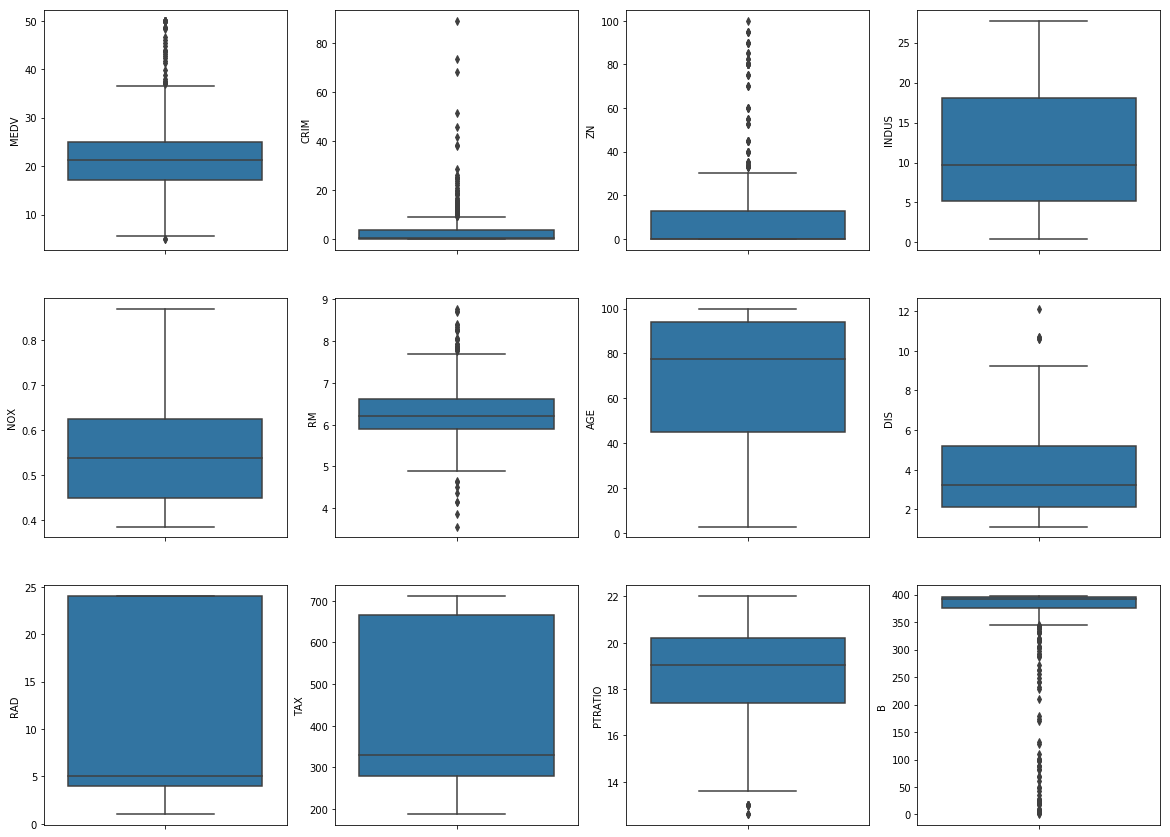

In [27]:
draw_multivarient_plot(df_boston.drop('CHAS',axis= 1),3,4,"box_plot")